<a href="https://colab.research.google.com/github/Gennifer2001/Manim/blob/main/Copia_de_Cobweb_Manim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRANSFORMACIÓN DIADICA
$$T(x)= \left\{ \begin{array}{lcc}
2x & si & 0 \leq x < \frac{1}{2} \\
2x-1 & si & \frac{1}{2} \leq x < 1
\end{array} \right.$$

## Librerías

In [ ]:
# @title
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
8 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
li

In [ ]:
# @title
from manim import *

Manim Community v0.18.0

In [ ]:
# @title
!pip install pynamical
import glob
import IPython.display as IPdisplay
from pynamical import *
from numba import jit
import numpy as np
import sympy as sp
import pandas as pd
from PIL import Image
from ipywidgets.widgets import *
%matplotlib inline

## Representación del modelo

In [ ]:
# @title
def map(l):
   t1 = np.linspace(0,.5)
   t2 = np.linspace(.5,1)
   def f1(t):
      return 2*l*t
   def f2(t):
      return 2*l*t-1

   plt.figure(figsize=(8,6))
   plt.title(r"Dyadic transformation", fontsize = 20)
   plt.xlabel(r"$t$", fontsize = 20)
   plt.ylabel(r"$f(t)$", fontsize = 20)
   plt.plot(t1, f1(t1),color="darkslateblue")
   plt.plot(t2, f2(t2),color="darkslateblue")
   plt.show()

In [ ]:
# @title
interact(map, l = FloatSlider(min=-10,max=10,step=0.1,value=1, description = r'lambda'))

interactive(children=(FloatSlider(value=1.0, description='lambda', max=10.0, min=-10.0), Output()), _dom_class…

<function __main__.map(l)>

## Calculo de los puntos fijos


$$T(x)= \left\{ \begin{array}{lcc}
2x & si & 0 \leq x < \frac{1}{2} \\
2x-1 & si & \frac{1}{2} \leq x < 1
\end{array} \right.$$

$x=0 \quad   \mbox{si}    \quad  0 \leq x < \frac{1}{2} $ y $x=1
\quad  \mbox{si} \quad  \frac{1}{2} \leq x < 1$

 Sin embargo, $x=1$ no pertenece al dominio de la función, por lo que el único punto fijo de $T(x)$ es $x=0$. Este punto es repulsor puesto que $T'(0) = 2$.


$$T^{(2)}(x)= \left\{ \begin{array}{lcc}
4 x & si & 0 \leq x < \frac{1}{4} \\
4 x -1 & si & \frac{1}{4} \leq x < \frac{1}{2} \\
4 x -2 & si & \frac{1}{2} \leq x < \frac{3}{4} \\
4 x- 3 & si & \frac{3}{4} \leq x < 1
\end{array} \right.$$

puntos fijos $x=0$, $x=\frac{1}{4}$, $x=\frac{2}{4}$ y $x=\frac{3}{4}$

$$T^{(3)}(x)= \left\{ \begin{array}{lcc}
8 x & si & 0 \leq x < \frac{1}{8} \\
8 x -1 & si & \frac{1}{8} \leq x < \frac{2}{8} \\
8 x -2 & si & \frac{2}{8} \leq x < \frac{3}{8} \\
8 x- 3 & si & \frac{3}{8} \leq x < \frac{4}{8} \\
8 x -4 & si & \frac{4}{8} \leq x < \frac{5}{8} \\
8 x -5 & si & \frac{5}{8} \leq x < \frac{6}{8} \\
8 x -6 & si & \frac{6}{8} \leq x < \frac{7}{8} \\
8 x- 7 & si & \frac{7}{8} \leq x < 1
\end{array} \right.$$

 puntos fijos de la forma $x=\frac{k}{2^3}$ con $k=\{0,1,\dots,7\}$.

$$T^{(n)}(x)= \left\{ \begin{array}{lcc}
2^nx & si & 0 \leq x < \frac{1}{2^n} \\
2^nx - 1 & si & \frac{1}{2^n} \leq x < \frac{2}{2^n} \\
\vdots \\
2^nx - (2^n-2) & si & \frac{2^n-2}{2^n} \leq x < \frac{2^n-1}{2^n} \\
2^nx- (2^n-1) & si & \frac{2^n-1}{2^n} \leq x < 1
\end{array} \right.$$

$T^{(n)}(x) = 2^nx - k $ con $k = \{0,1,\dots,2^n-1\}$ y los intervalos estarán definidos como $\left[\frac{k}{2^n},\frac{k+1}{2^n}\right)$,

In [ ]:
# @title
%%manim -qm -v WARNING CobwebPlot

class CobwebPlot(Scene):
    def construct(self):
      # Define la función a trozos
        def f(x):
            if 0 <= x < 1/2:
                return 2 * x
            elif 1/2 <= x < 1:
                return 2 * x - 1


        plot_axes = Axes(
            x_range=[0, 1, 0.1],
            y_range=[-0.1, 1.1, 0.1],
            x_length=9,
            y_length=5,
            axis_config={
                "include_numbers": True,
                "font_size": 20,
            },
            tips=False,
        )

        y_label = plot_axes.get_y_axis_label("", edge=DOWN, direction=DOWN, buff=0.2)
        x_label = plot_axes.get_x_axis_label("", edge=DOWN,
                                             direction=DOWN, buff=0.4)
        plot_labels = VGroup(x_label, y_label)

        #Función a trozos
        graph_1 = plot_axes.plot(lambda x: 2 * x ,x_range=[0,1/2], color=TEAL)
        graph_2 = plot_axes.plot(lambda x: 2 * x-1 ,x_range=[1/2,1], color=TEAL)



        # Genera puntos para graficar la función a trozos
        x_values_func = np.linspace(0, 1, 50)
        y_values_func = [f(x) for x in x_values_func]

        # Crea gráficos y líneas en la escena
#        plot = plt.figure(figsize=(10, 5))
        #func_curve = VGroup()
        #plane = NumberPlane(x_range=[0, 1, 0.1], y_range=[0, 1, 0.1])

        # Agregar la grilla a la escena
        #self.play(Create(plane))
            # Crear puntos

        title = Title(
            r""" $f(x) = \begin{cases}
                                          2x & \text{si } 0 \leq x < \frac{1}{2} \\
                                          2x - 1 & \text{si } \frac{1}{2} \leq x \leq 1
                                          \end{cases}$""",
            include_underline=False,
            font_size=40,
        )
        # Agrega elementos gráficos a la escena
        self.play(Write(title))
        self.play(Create(plot_axes), Create(plot_labels))
        self.wait(2)
        self.play(Create(graph_1),Create(graph_2))
        self.wait(5)

#        self.play(Create(func_curve), Create(diagonal_line))
#        self.wait(2)

In [ ]:
# @title
%%manim -qm -v WARNING CobwebPlot

class CobwebPlot(Scene):
    def construct(self):
      # Define la función a trozos
        def f(x):
            if 0 <= x < 1/2:
                return 2 * x
            elif 1/2 <= x < 1:
                return 2 * x - 1
        # Valores iniciales
        x0 = 0.01  # Cambia esto según tu condición inicial
        iterations = 50

        # Arrays para almacenar puntos del cobweb plot
        x_values = [x0]
        y_values = [0]

        plot_axes = Axes(
            x_range=[0, 1, 0.1],
            y_range=[-0.1, 1.1, 0.1],
            x_length=9,
            y_length=5,
            axis_config={
                "include_numbers": True,
                "font_size": 20,
            },
            tips=False,
        )

        y_label = plot_axes.get_y_axis_label("", edge=DOWN, direction=DOWN, buff=0.2)
        x_label = plot_axes.get_x_axis_label("", edge=DOWN,
                                             direction=DOWN, buff=0.4)
        plot_labels = VGroup(x_label, y_label)

        #Función a trozos
        graph_1 = plot_axes.plot(lambda x: 2 * x ,x_range=[0,1/2], color=TEAL)
        graph_2 = plot_axes.plot(lambda x: 2 * x-1 ,x_range=[1/2,1], color=TEAL)

        #Grafica de la función y=x pero punteada
        graph_3 = plot_axes.plot(lambda x: x ,x_range=[0,1], color=RED)
        func_even = DashedVMobject(graph_3,num_dashes=50,equal_lengths=True)
        func_stretched = DashedVMobject(graph_3, num_dashes=50, equal_lengths=False)
        bottom_row = VGroup(func_even,func_stretched)

        #Iteraciones
        for i in range(iterations):
            x1 = f(x0)
            x_values.extend([x0, x1])
            y_values.extend([x1, x1])
            x0 = x1

        # Genera puntos para graficar la función a trozos
        x_values_func = np.linspace(0, 1, 50)
        y_values_func = [f(x) for x in x_values_func]

        # Crea gráficos y líneas en la escena
#        plot = plt.figure(figsize=(10, 5))
        #func_curve = VGroup()
        #plane = NumberPlane(x_range=[0, 1, 0.1], y_range=[0, 1, 0.1])

        # Agregar la grilla a la escena
        #self.play(Create(plane))
            # Crear puntos
        cobweb_points = [plot_axes.coords_to_point(x_values[i], y_values[i]) for i in range(len(x_values))]

            # Crear líneas conectando los puntos
        cobweb_lines = VGroup(*[Line(cobweb_points[i], cobweb_points[i + 1]) for i in range(len(x_values) - 1)])
        #for i in range(len(x_values)):
            #func_curve += Dot(point=plot_axes.c2p(x_values[i], y_values[i], 0), color=GREEN, radius=0.2)
            #func_curve += plot_axes.plot((x_values[i], y_values[i]),(x_values[i+1], y_values[i+1]), color=GREEN)
        #func_curve = plt.plot(x_values_func, y_values_func, label='f(x)', color='green')
        #cobweb_curve = plt.plot(x_values, y_values, 'b-', linewidth=2, label='Cobweb Plot')
#        diagonal_line = plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), 'r--')

        title = Title(
            r"""Cobweb Plot de la función $f(x) = \begin{cases}
                                          2x & \text{si } 0 \leq x < \frac{1}{2} \\
                                          2x - 1 & \text{si } \frac{1}{2} \leq x \leq 1
                                          \end{cases}$""",
            include_underline=False,
            font_size=40,
        )
        # Agrega elementos gráficos a la escena
        self.play(Write(title))
        self.play(Create(plot_axes), Create(plot_labels))
        self.wait(2)
        self.play(Create(graph_1),Create(graph_2))
        self.wait(1)
        self.play(Create(bottom_row))
        self.wait(1)
        self.play(Create(cobweb_lines),run_time=10)
        #self.play(AnimationGroup(cobweb_lines, lag_ratio=0.2))
        self.wait(1)
#        self.play(Create(func_curve), Create(diagonal_line))
#        self.wait(2)


In [ ]:
# @title
%%manim -qm -v WARNING CobwebPlot2

class CobwebPlot2(Scene):
    def construct(self):
      # Define la función a trozos
        def f(x):
            if 0 <= x < 1/2:
                return 2 * x
            elif 1/2 <= x < 1:
                return 2 * x - 1
        # Valores iniciales
        x0 = 0.06  # Cambia esto según tu condición inicial
        iterations = 50

        # Arrays para almacenar puntos del cobweb plot
        x_values = [x0]
        y_values = [0]

        plot_axes = Axes(
            x_range=[0, 1, 0.1],
            y_range=[-0.1, 1.1, 0.1],
            x_length=9,
            y_length=5,
            axis_config={
                "include_numbers": True,
                "font_size": 20,
            },
            tips=False,
        )

        y_label = plot_axes.get_y_axis_label("", edge=DOWN, direction=DOWN, buff=0.2)
        x_label = plot_axes.get_x_axis_label("", edge=DOWN,
                                             direction=DOWN, buff=0.4)
        plot_labels = VGroup(x_label, y_label)

        #Función a trozos
        graph_1 = plot_axes.plot(lambda x: 2 * x ,x_range=[0,1/2], color=TEAL)
        graph_2 = plot_axes.plot(lambda x: 2 * x-1 ,x_range=[1/2,1], color=TEAL)

        #Grafica de la función y=x pero punteada
        graph_3 = plot_axes.plot(lambda x: x ,x_range=[0,1], color=RED)
        func_even = DashedVMobject(graph_3,num_dashes=50,equal_lengths=True)
        func_stretched = DashedVMobject(graph_3, num_dashes=50, equal_lengths=False)
        bottom_row = VGroup(func_even,func_stretched)

        #Iteraciones
        for i in range(iterations):
            x1 = f(x0)
            x_values.extend([x0, x1])
            y_values.extend([x1, x1])
            x0 = x1

        # Genera puntos para graficar la función a trozos
        x_values_func = np.linspace(0, 1, 50)
        y_values_func = [f(x) for x in x_values_func]

            # Crear puntos
        cobweb_points = [plot_axes.coords_to_point(x_values[i], y_values[i]) for i in range(len(x_values))]

            # Crear líneas conectando los puntos
        cobweb_lines = VGroup(*[Line(cobweb_points[i], cobweb_points[i + 1]) for i in range(len(x_values) - 1)])

        title = Title(
            r"""Cobweb Plot de la función $f(x) = \begin{cases}
                                          2x & \text{si } 0 \leq x < \frac{1}{2} \\
                                          2x - 1 & \text{si } \frac{1}{2} \leq x \leq 1
                                          \end{cases}$""",
            include_underline=False,
            font_size=40,
        )
        # Agrega elementos gráficos a la escena
        self.play(Write(title))
        self.play(Create(plot_axes), Create(plot_labels))
        self.play(Create(graph_1),Create(graph_2))
        self.wait(1)
        self.play(Create(bottom_row))
        self.wait(1)
        self.play(Create(cobweb_lines),run_time=10)
        self.wait(1)

In [ ]:
# @title
%%manim -qm -v WARNING CobwebPlot2Ciclo

class CobwebPlot2Ciclo(Scene):
    def construct(self):
      # Define la función a trozos
        def f(x):
            if 0 <= x < 1/4:
                return 4 * x
            elif 1/4 <= x < 1/2:
                return 4 * x - 1
            elif 1/2 <= x < 3/4:
                return 4 * x - 2
            elif 3/4 <= x < 1:
                return 4 * x - 3

        # Valores iniciales
        x0 = 0.1  # Cambia esto según tu condición inicial
        iterations = 50

        # Arrays para almacenar puntos del cobweb plot
        x_values = [x0]
        y_values = [0]

        plot_axes = Axes(
            x_range=[0, 1, 0.1],
            y_range=[-0.1, 1.1, 0.1],
            x_length=9,
            y_length=5,
            axis_config={
                "include_numbers": True,
                "font_size": 20,
            },
            tips=False,
        )

        y_label = plot_axes.get_y_axis_label("", edge=DOWN, direction=DOWN, buff=0.2)
        x_label = plot_axes.get_x_axis_label("", edge=DOWN,
                                             direction=DOWN, buff=0.4)
        plot_labels = VGroup(x_label, y_label)

        #Función a trozos
        graph_1 = plot_axes.plot(lambda x: 4 * x ,x_range=[0,1/4], color=TEAL)
        graph_2 = plot_axes.plot(lambda x: 4 * x-1 ,x_range=[1/4,1/2], color=TEAL)
        graph_3 = plot_axes.plot(lambda x: 4 * x-2 ,x_range=[1/2,3/4], color=TEAL)
        graph_4 = plot_axes.plot(lambda x: 4 * x-3 ,x_range=[3/4,1], color=TEAL)

        #Grafica de la función y=x pero punteada
        graph_5 = plot_axes.plot(lambda x: x ,x_range=[0,1], color=RED)
        func_even = DashedVMobject(graph_5,num_dashes=50,equal_lengths=True)
        func_stretched = DashedVMobject(graph_5, num_dashes=50, equal_lengths=False)
        bottom_row = VGroup(func_even,func_stretched)

        #Iteraciones
        for i in range(iterations):
            x1 = f(x0)
            x_values.extend([x0, x1])
            y_values.extend([x1, x1])
            x0 = x1

        # Genera puntos para graficar la función a trozos
        x_values_func = np.linspace(0, 1, 50)
        y_values_func = [f(x) for x in x_values_func]

        # Crea gráficos y líneas en la escena
#        plot = plt.figure(figsize=(10, 5))
        #func_curve = VGroup()
        #plane = NumberPlane(x_range=[0, 1, 0.1], y_range=[0, 1, 0.1])

        # Agregar la grilla a la escena
        #self.play(Create(plane))
            # Crear puntos
        cobweb_points = [plot_axes.coords_to_point(x_values[i], y_values[i]) for i in range(len(x_values))]

            # Crear líneas conectando los puntos
        cobweb_lines = VGroup(*[Line(cobweb_points[i], cobweb_points[i + 1]) for i in range(len(x_values) - 1)])
        #for i in range(len(x_values)):
            #func_curve += Dot(point=plot_axes.c2p(x_values[i], y_values[i], 0), color=GREEN, radius=0.2)
            #func_curve += plot_axes.plot((x_values[i], y_values[i]),(x_values[i+1], y_values[i+1]), color=GREEN)
        #func_curve = plt.plot(x_values_func, y_values_func, label='f(x)', color='green')
        #cobweb_curve = plt.plot(x_values, y_values, 'b-', linewidth=2, label='Cobweb Plot')
#        diagonal_line = plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), 'r--')

        title = Title(
            r"""Cobweb Plot de la función $f(x) = \begin{cases}
                                          2x & \text{si } 0 \leq x < \frac{1}{2} \\
                                          2x - 1 & \text{si } \frac{1}{2} \leq x \leq 1
                                          \end{cases}$ 2-ciclo""",
            include_underline=False,
            font_size=40,
        )
        # Agrega elementos gráficos a la escena
        self.play(Write(title))
        self.play(Create(plot_axes), Create(plot_labels))
        self.wait(2)
        self.play(Create(graph_1),Create(graph_2),Create(graph_3),Create(graph_4))
        self.wait(1)
        self.play(Create(bottom_row))
        self.wait(1)
        self.play(Create(cobweb_lines), run_time=10)
        #self.play(AnimationGroup(cobweb_lines, lag_ratio=0.2))
        self.wait(1)
#        self.play(Create(func_curve), Create(diagonal_line))
#        self.wait(2)

## Error de máquina
Valores de la forma
$$\frac{k}{2^n}$$

<ipython-input-15-0e15d0456017>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(t, f(t), 'k', color="darkslateblue")
<ipython-input-15-0e15d0456017>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t, t, "k:",color="crimson")
<ipython-input-15-0e15d0456017>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot([x, y], [y,  y], 'b', linewidth=1, color="green")
<ipython-input-15-0e15d0456017>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot([y, y], [y, fy], 'b', linewid

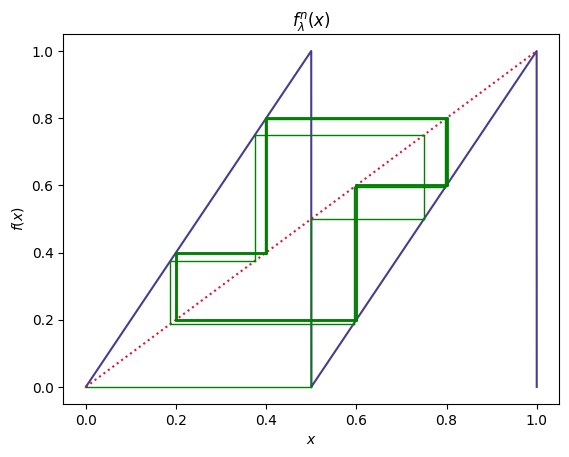

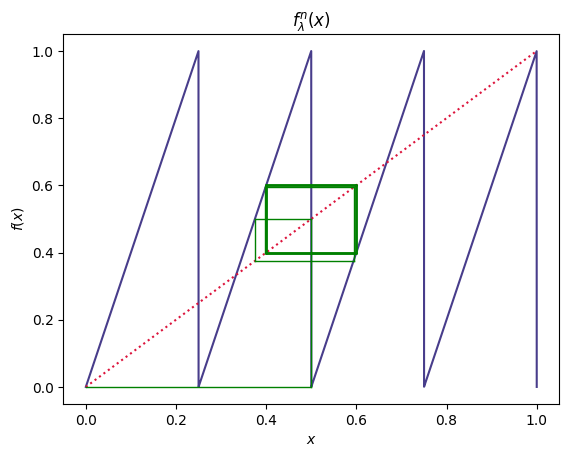

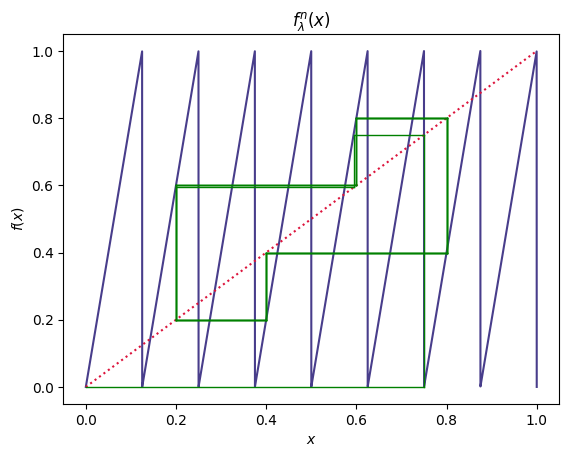

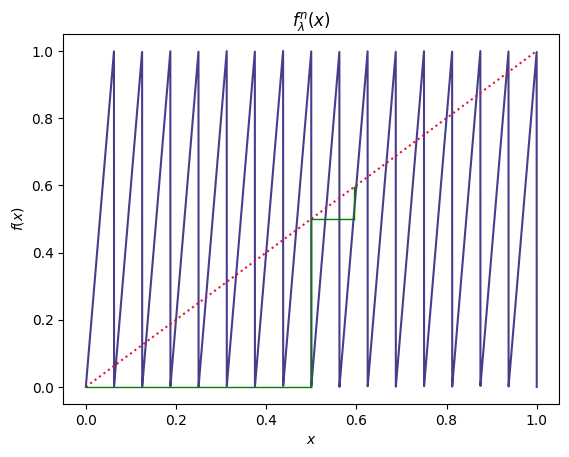

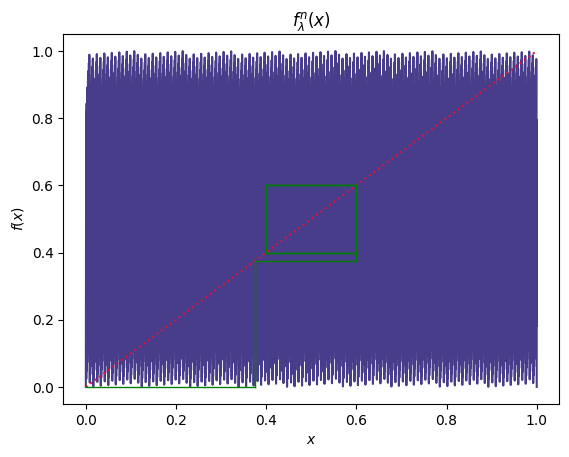

In [ ]:
# @title
cobweb(cobweb_plot,0.6,5000)
cobweb(cobweb_plot_compose1,0.6,5000)
cobweb(cobweb_plot_compose2,0.6,5000)
cobweb(cobweb_plot_compose3,0.6,5000)
cobweb(cobweb_plot_compose6,0.6,5000)

In [ ]:
# @title
%%manim -qm -v WARNING CobwebPlot3Ciclo

class CobwebPlot3Ciclo(Scene):
    def construct(self):
      # Define la función a trozos
        def f(x):
            if 0 <= x < 1/8:
                return 8 * x
            elif 1/8 <= x < 1/4:
                return 8 * x - 1
            elif 1/4 <= x < 3/8:
                return 8 * x - 2
            elif 3/8 <= x < 1/2:
                return 8 * x - 3
            elif 1/2 <= x < 5/8:
                return 8 * x - 4
            elif 5/8 <= x < 3/4:
                return 8 * x - 5
            elif 3/4 <= x < 7/8:
                return 8 * x - 6
            elif 7/8 <= x < 1:
                return 8 * x - 7
        # Valores iniciales
        x0 = 1/np.pi  # Cambia esto según tu condición inicial
        iterations = 50

        # Arrays para almacenar puntos del cobweb plot
        x_values = [x0]
        y_values = [0]

        plot_axes = Axes(
            x_range=[0, 1, 0.1],
            y_range=[-0.1, 1.1, 0.1],
            x_length=9,
            y_length=5,
            axis_config={
                "include_numbers": True,
                "font_size": 20,
            },
            tips=False,
        )

        y_label = plot_axes.get_y_axis_label("", edge=DOWN, direction=DOWN, buff=0.2)
        x_label = plot_axes.get_x_axis_label("", edge=DOWN,
                                             direction=DOWN, buff=0.4)
        plot_labels = VGroup(x_label, y_label)

        #Función a trozos
        graph_1 = plot_axes.plot(lambda x: 8 * x ,x_range=[0,1/8], color=TEAL)
        graph_2 = plot_axes.plot(lambda x: 8 * x-1 ,x_range=[1/8,1/4], color=TEAL)
        graph_3 = plot_axes.plot(lambda x: 8 * x-2 ,x_range=[1/4,3/8], color=TEAL)
        graph_4 = plot_axes.plot(lambda x: 8 * x-3 ,x_range=[3/8,1/2], color=TEAL)
        graph_5 = plot_axes.plot(lambda x: 8 * x-4 ,x_range=[1/2,5/8], color=TEAL)
        graph_6 = plot_axes.plot(lambda x: 8 * x-5 ,x_range=[5/8,3/4], color=TEAL)
        graph_7 = plot_axes.plot(lambda x: 8 * x-6 ,x_range=[3/4,7/8], color=TEAL)
        graph_8 = plot_axes.plot(lambda x: 8 * x-7 ,x_range=[7/8,1], color=TEAL)

        #Grafica de la función y=x pero punteada
        graph_9 = plot_axes.plot(lambda x: x ,x_range=[0,1], color=RED)
        func_even = DashedVMobject(graph_9,num_dashes=50,equal_lengths=True)
        func_stretched = DashedVMobject(graph_9, num_dashes=50, equal_lengths=False)
        bottom_row = VGroup(func_even,func_stretched)

        #Iteraciones
        for i in range(iterations):
            x1 = f(x0)
            x_values.extend([x0, x1])
            y_values.extend([x1, x1])
            x0 = x1

        # Genera puntos para graficar la función a trozos
        x_values_func = np.linspace(0, 1, 50)
        y_values_func = [f(x) for x in x_values_func]

        # Crea gráficos y líneas en la escena
#        plot = plt.figure(figsize=(10, 5))
        #func_curve = VGroup()
        #plane = NumberPlane(x_range=[0, 1, 0.1], y_range=[0, 1, 0.1])

        # Agregar la grilla a la escena
        #self.play(Create(plane))
            # Crear puntos
        cobweb_points = [plot_axes.coords_to_point(x_values[i], y_values[i]) for i in range(len(x_values))]

            # Crear líneas conectando los puntos
        cobweb_lines = VGroup(*[Line(cobweb_points[i], cobweb_points[i + 1]) for i in range(len(x_values) - 1)])
        #for i in range(len(x_values)):
            #func_curve += Dot(point=plot_axes.c2p(x_values[i], y_values[i], 0), color=GREEN, radius=0.2)
            #func_curve += plot_axes.plot((x_values[i], y_values[i]),(x_values[i+1], y_values[i+1]), color=GREEN)
        #func_curve = plt.plot(x_values_func, y_values_func, label='f(x)', color='green')
        #cobweb_curve = plt.plot(x_values, y_values, 'b-', linewidth=2, label='Cobweb Plot')
#        diagonal_line = plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), 'r--')


        title = Title(
            r"""Cobweb Plot de la función $f(x) = \begin{cases}
                                          2x & \text{si } 0 \leq x < \frac{1}{2} \\
                                          2x - 1 & \text{si } \frac{1}{2} \leq x \leq 1
                                          \end{cases}$ 3-ciclo""",
            include_underline=False,
            font_size=40,
        )
        # Agrega elementos gráficos a la escena
        self.play(Write(title))
        self.play(Create(plot_axes), Create(plot_labels))
        self.wait(2)
        self.play(Create(graph_1),Create(graph_2),Create(graph_3),Create(graph_4),Create(graph_5),Create(graph_6),Create(graph_7),Create(graph_8))
        self.wait(1)
        self.play(Create(bottom_row))
        self.wait(1)
        self.play(Create(cobweb_lines), run_time=15)
        #self.play(AnimationGroup(cobweb_lines, lag_ratio=0.2))
        self.wait(1)
#        self.play(Create(func_curve), Create(diagonal_line))
#        self.wait(2)

## Bifurcación analítica para el parametro λ

$T_{\lambda}(x)= \left\{ \begin{array}{lcc}
2\lambda x & si & 0 \leq x < \frac{1}{2} \\
2\lambda x-1 & si & \frac{1}{2} \leq x < 1
\end{array} \right.$

Con puntos fijos $x=0 \quad x=\frac{1}{2\lambda -1}$

$T_{\lambda}^{(2)}(x)= \left\{ \begin{array}{lcc}
(2\lambda)^2 x & si & 0 \leq x \leq \frac{1}{4} \\
(2\lambda)^2 x -1 & si & \frac{1}{4} \leq x \leq \frac{1}{2} \\
(2\lambda)^2 x -2\lambda & si & \frac{1}{2} \leq x \leq \frac{3}{4} \\
(2\lambda)^2 x- 2\lambda -1 & si & \frac{3}{4} \leq x < 1
\end{array} \right.$

Con  $x=0 \qquad x=\frac{1}{2\lambda -1} \qquad x=\frac{1}{(2\lambda)^2 -1} \qquad x=\frac{2\lambda}{(2\lambda)^2 -1}$

$T_{\lambda}^{(3)}(x)= \left\{ \begin{array}{lcc}
(2\lambda)^3 x & si & 0 \leq x \leq \frac{1}{8} \\
(2\lambda)^3 x - (2\lambda)^2 & si & \frac{1}{8} \leq x \leq \frac{1}{4} \\
(2\lambda)^3 x -1 & si & \frac{1}{4} \leq x \leq \frac{3}{8} \\
(2\lambda)^3 x-(2\lambda)^2-1 & si & \frac{3}{8} \leq x < \frac{1}{2} \\
(2\lambda)^3 x -2 & si & \frac{1}{2} \leq x \leq \frac{5}{8} \\
(2\lambda)^3 x -(2\lambda)^2-2 & si & \frac{5}{8} \leq x \leq \frac{3}{4} \\
(2\lambda)^3 x -3 & si & \frac{3}{4} \leq x \leq \frac{7}{8} \\
(2\lambda)^3 x -(2\lambda)^2-3 & si & \frac{7}{8} \leq x \leq 1
\end{array} \right.$

Con
$$x=0 \qquad x=\frac{(2\lambda)^2}{(2\lambda)^3 -1} \qquad x=\frac{1}{(2\lambda)^3 -1} \qquad x=\frac{1+ (2\lambda)^2}{(2\lambda)^3 -1} \qquad
x=\frac{2}{(2\lambda)^3 -1} \qquad x=\frac{2+ (2\lambda)^2}{(2\lambda)^3 -1} \qquad x=\frac{3}{(2\lambda)^3 -1} \qquad x=\frac{3+ (2\lambda)^2}{(2\lambda)^3 -1}$$

En general se observa que, es atractor para $\lambda \in (\frac{-1}{2},\frac{1}{2})$, repulsor para $\lambda \in (-\infty,\frac{-1}{2})\cup (\frac{1}{2},\infty) $ y en $\lambda =\frac{1}{2}$ el criterio no será concluyente.

In [ ]:
# @title
@jit(nopython=True)
def iterated_map(x,l):
    return (2*l*x) %1

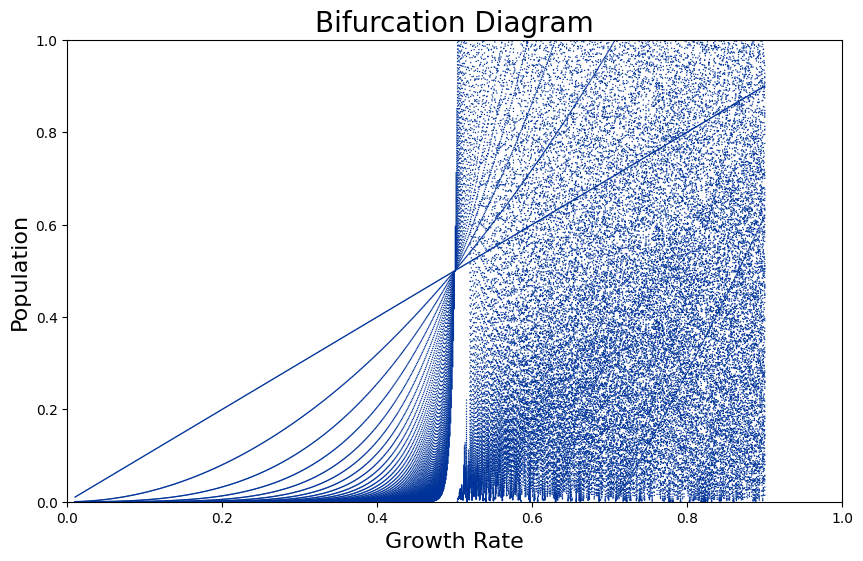

In [ ]:
# @title
pops = simulate(model=iterated_map, num_gens=100, rate_min=0.01, rate_max=.9, num_rates=1000, num_discard=1)
bifurcation_plot(pops, xmin=0, xmax=1,ymin=0, ymax=1,save=False)

## n-ciclos y error de aproximación de máquina

In [ ]:
# @title
def cobweb(f, x0, N):
    # plot the function being iterated
    t = np.linspace(0, 1, N)
    plt.plot(t, f(t), 'k', color="darkslateblue")

    # plot the dotted line y = x
    plt.plot(t, t, "k:",color="crimson")

    # plot the iterates
    x, y = x0, f(x0)
    for _ in range(N):
        fy = f(y)
        plt.plot([x, y], [y,  y], 'b', linewidth=1, color="green")
        plt.plot([y, y], [y, fy], 'b', linewidth=1, color="green")
        x, y = y, fy

    plt.ylabel("$f(x)$")
    plt.xlabel("$x$")
    plt.title("$f_\lambda ^n(x)$")
    plt.show()

def cobweb_plot(x,l=1):
    return np.piecewise(x, [(x>0)&(x<0.5),x==0.5, (x>0.5)&(x<1)], [lambda x: 2*l*x,lambda x: x*0 , lambda x: 2*l*x-1])

def cobweb_plot_compose1(x):
    return cobweb_plot(cobweb_plot(x))

def cobweb_plot_compose2(x):
    return cobweb_plot(cobweb_plot(cobweb_plot(x)))

def cobweb_plot_compose3(x):
    return cobweb_plot(cobweb_plot(cobweb_plot(cobweb_plot(x))))

def cobweb_plot_compose6(x):
    return cobweb_plot(cobweb_plot(cobweb_plot(cobweb_plot(cobweb_plot(cobweb_plot(cobweb_plot(cobweb_plot(cobweb_plot(cobweb_plot(x))))))))))